In [1]:
from os import walk
import numpy as np
import pandas as pd

#from nilearn.datasets import fetch_haxby
from nilearn.input_data import NiftiMasker

from kmapper import KeplerMapper, Cover
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

import nilearn as nl
from nilearn.image import load_img

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

from dyneusr import DyNeuGraph
from dyneusr.tools import visualize_mapper_stages

import kmapper as km
from kmapper import jupyter # Creates custom CSS full-size Jupyter screen
import umap
import sklearn


Bad key "text.kerning_factor" on line 4 in
/om2/user/jsmentch/anaconda/envs/dyneusr/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import sem


In [3]:
#from dyneusr
from sklearn.cluster import DBSCAN
def optimize_dbscan(X, k=3, p=100.0, min_samples=2, **kwargs):
    """ Get dbscan based on eps determined by data.
    """
    eps = optimize_eps(X, k=k, p=p)
    dbscan = DBSCAN(
        eps=eps, min_samples=min_samples, 
        metric='minkowski', p=2, leaf_size=15,
        **kwargs
        )
    return dbscan

def optimize_eps(X, k=3, p=100.0, **kwargs):
    """ Get optimized value for eps based on data. 
    Parameters
    ----------
    k: int
        * calculate distance to k-th nearest neighbor
    p: float 
        * threshold percentage to keep
    Returns
    -------
    eps: float
        * a parameter for DBSCAN
    """
    from sklearn.neighbors import KDTree

    # Use 'minkowski', p=2 (i.e. euclidean metric)
    tree = KDTree(X, metric='minkowski', p=2, leaf_size=15)

    # Query k nearest-neighbors for X, not including self
    dist, ind = tree.query(X, k=k+1)

    # Find eps s.t. % of points within eps of k nearest-neighbor 
    eps = np.percentile(dist[:, k], p)
    return eps

In [54]:
clean_path = '/nobackup/scratch/Mon/jsmentch/hbn_cifti_cleaned/smoothed/'
subject_flist = list(walk(clean_path))[0][1]

In [ ]:
import os.path
output_dir='../outputs/mapper/HBN/'
for s in subject_flist:
    sub = s[-16:]
    print(sub)
    file=f'{clean_path}{s}/{sub}_clean_task-movieDM_space-fsLR_den-91k_bold.dtseries.nii'
    print(file)
    if os.path.isfile(file):
        img=load_img(file)
        img_data[np.isnan(img_data)] = 0
        title = 'wb_umap_HBN_'
        data = img_data
        mapper = km.KeplerMapper()
        # Fit to and transform the data
        #lens
        #projected_data = mapper.fit_transform(data, projection=TSNE(2), distance_matrix=True)
        #projected_data = mapper.fit_transform(data, projection=umap.UMAP(n_components=2))
        projected_data = mapper.fit_transform(data, projection=TSNE(2))
        # Create dictionary called 'graph' with nodes, edges and meta-information
        #graph = mapper.map(projected_data, data, clusterer=sklearn.cluster.DBSCAN(eps=0.5,min_samples=3))
        graph = mapper.map(projected_data, data, clusterer=optimize_dbscan(data, k=3, p=100.0))
        graph_nx = km.adapter.to_nx(graph)
        degrees=graph_nx.degree
        degreelist = np.zeros(umaped.embedding_.shape[0])
        nodes = graph['nodes']
        for node in list(graph['nodes']):
            for point in nodes[node]:
                if degreelist[point]<degrees[node]:
                    degreelist[point]=degrees[node]
        np.save(f'{output_dir}degreelist/{sub}.npy',degreelist)

In [13]:
#load first run
img = load_img(f'/nobackup/scratch/Mon/jsmentch/hbn_cifti_cleaned/smoothed/sub-NDARFR301KKP/sub-NDARFR301KKP_clean_task-movieDM_space-fsLR_den-91k_bold.dtseries.nii')
img_data = img.get_fdata()
img_data[np.isnan(img_data)] = 0


In [14]:
img_data.shape

(750, 91282)

In [15]:
#umaped = umap.UMAP(n_components=2).fit(img_data_all)
umaped = umap.UMAP(n_components=2).fit(img_data)

In [16]:
umaped.embedding_.shape

(750, 2)

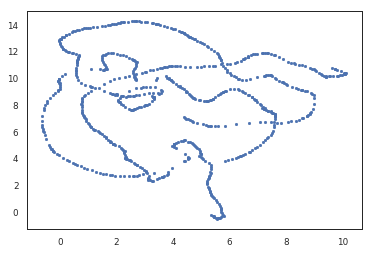

In [17]:
plt.scatter(umaped.embedding_[:, 0], umaped.embedding_[:, 1], s= 5, cmap='viridis')

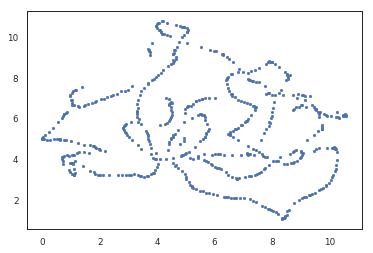

In [30]:
plt.scatter(umaped.embedding_[:, 0], umaped.embedding_[:, 1], s= 5, cmap='viridis')

In [ ]:
#plot some different lenses

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (750, 91282)

..Projecting data using: 
	TSNE(verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 750 samples in 0.042s...
[t-SNE] Computed neighbors for 750 samples in 2.944s...
[t-SNE] Computed conditional probabilities for sample 750 / 750
[t-SNE] Mean sigma: 27.196872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.916153
[t-SNE] KL divergence after 1000 iterations: 0.933257

..Scaling with: MinMaxScaler()

Mapping on data shaped (750, 91282) using lens shaped (750, 2)

Creating 100 hypercubes.

Created 95 edges and 80 nodes in 0:00:02.466389.


label,group,value,row_count
meta-column-0,0,280875,750


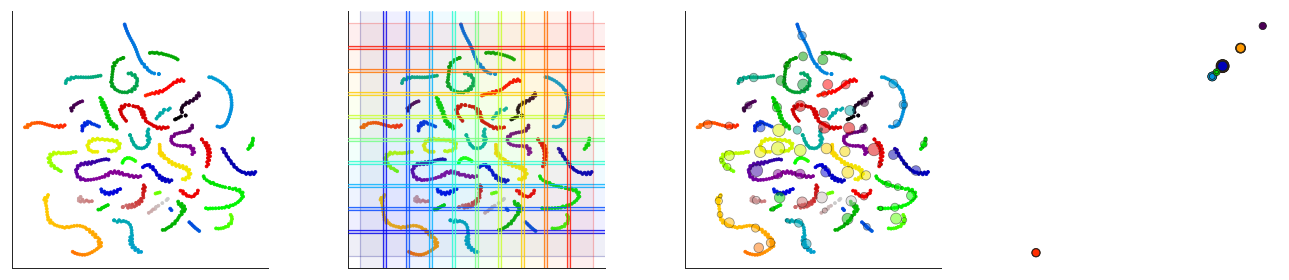

In [18]:
title = 'wb_umap_HBN_'
data = img_data
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data

#lens
#projected_data = mapper.fit_transform(data, projection=TSNE(2), distance_matrix=True)
#projected_data = mapper.fit_transform(data, projection=umap.UMAP(n_components=2))
projected_data = mapper.fit_transform(data, projection=TSNE(2))

# Create dictionary called 'graph' with nodes, edges and meta-information
#graph = mapper.map(projected_data, data, clusterer=sklearn.cluster.DBSCAN(eps=0.5,min_samples=3))
graph = mapper.map(projected_data, data, clusterer=optimize_dbscan(data, k=3, p=100.0))

# html = mapper.visualize(graph, path_html='../visuals/dyneusr/kmapper_'+title+'.html',
#                  title=title)#,custom_tooltips=labels)

# jupyter.display(path_html="all_features_mean_dcorr_umap.html")

fig, axes = visualize_mapper_stages(data, np.arange(data.shape[0]), lens=projected_data, graph=graph, cover=mapper.cover, layout="spectral")
# Visualize the shape graph using DyNeuSR's DyNeuGraph                          
#dG = DyNeuGraph(G=graph)

#dG = DyNeuGraph(G=graph, y=df_speech)
#dG.visualize('../visuals/dyneusr/dyneusr_'+title+'_.html')

In [20]:
#method to find the index of nearest value in an array
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx,array[idx]

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.9)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (598, 91282)

..Projecting data using: 
	UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.9, verbose=1)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.9, verbose=1)
Construct fuzzy simplicial set
Mon Jun 28 14:43:21 2021 Finding Nearest Neighbors
Mon Jun 28 14:43:21 2021 Finished Nearest Neighbor Search
Mon Jun 28 14:43:21 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Jun 28 14:43:26 2021 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (598, 91282) using lens shaped (598, 2

label,group,value,row_count
meta-column-0,0,178503,598


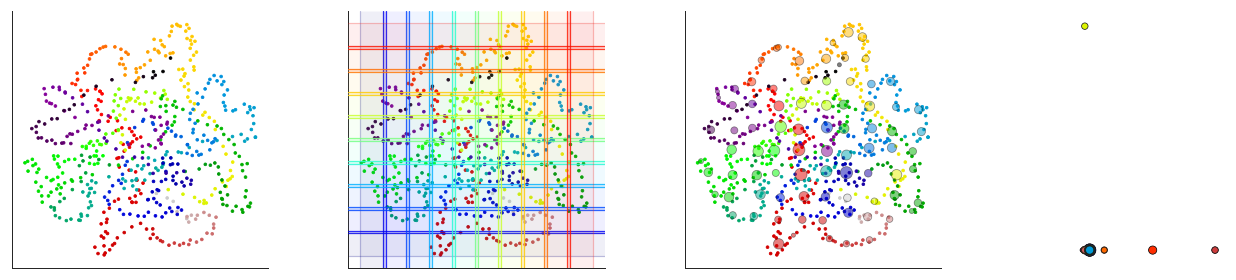

In [114]:
data = img_data
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data, projection=umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.9))
#projected_data = mapper.fit_transform(data, projection=TSNE(2))
graph = mapper.map(projected_data, data, clusterer=optimize_dbscan(data, k=3, p=100.0))
fig, axes = visualize_mapper_stages(data, np.arange(data.shape[0]), lens=projected_data, graph=graph, cover=mapper.cover, layout="spectral")
fig.patch.set_facecolor('xkcd:white')

In [21]:
graph_nx = km.adapter.to_nx(graph)

degrees=graph_nx.degree

degreelist = np.zeros(umaped.embedding_.shape[0])
nodes = graph['nodes']
for node in list(graph['nodes']):
    for point in nodes[node]:
        if degreelist[point]<degrees[node]:
            degreelist[point]=degrees[node]

NameError: name 'pr' is not defined

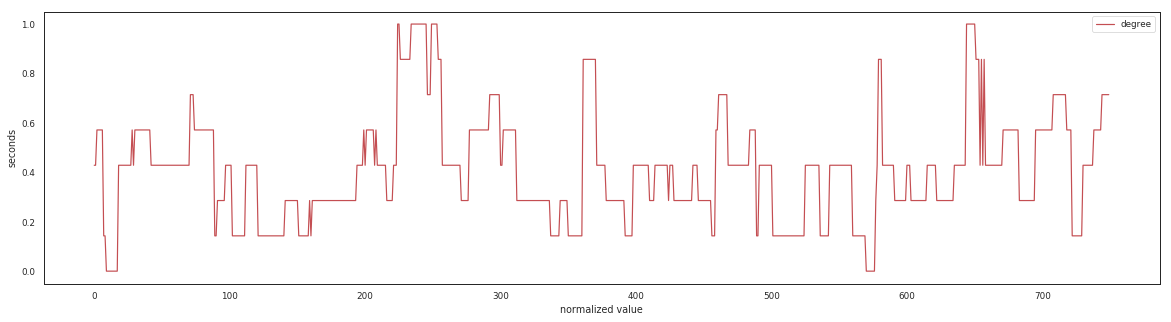

In [23]:
plt.figure(figsize=(20, 5),facecolor='white')
####plt.plot(flow_10hz/max(flow_10hz),label='optic flow')
plt.plot(degreelist/max(degreelist),label = 'degree',c='r')
plt.xlabel('normalized value')
plt.ylabel('seconds')
plt.legend()
plt.title(f'Budapest part 1, r={pr:.3f} umap nn=15 md=0.9')

## get flow from all runs

## get flow from runs at 10 HZ and export as tsv for feature vieualization

## run for all budapest subjects and runs

In [ ]:
clean_path = '/nobackup/scratch/Mon/jsmentch/nat_img/sourcedata/data/budapest/brain/ds003017/derivatives/fmriprep/derivatives/cleaned/smoothed/'
subject_flist = list(walk(clean_path))[0][2:][0]

for s in subject_flist:
    print(f'working on sub {sub} run {run}')
    sub = s[0:13]
    run = s[17]
    flow = optic_flow_list[int(run)-1]
    img = load_img(f'{clean_path}{s}')
    img_data = img.get_fdata()
    img_data[np.isnan(img_data)] = 0
    
    data = img_data
    mapper = km.KeplerMapper(verbose=1)
    projected_data = mapper.fit_transform(data, projection=umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1)) #umap default
    #projected_data = mapper.fit_transform(data, projection=TSNE(2))
    graph = mapper.map(projected_data, data, clusterer=optimize_dbscan(data, k=3, p=100.0))
    fig, axes = visualize_mapper_stages(data, np.arange(data.shape[0]), lens=projected_data, graph=graph, cover=mapper.cover, layout="spectral")
    fig.patch.set_facecolor('xkcd:white')
    plt.savefig(f'../outputs/mapper/budapest{run}_{sub}.png')
    plt.close()
    

    graph_nx = km.adapter.to_nx(graph)

    degrees=graph_nx.degree

    degreelist = np.zeros(segment_lengths[int(run)-1])
    nodes = graph['nodes']
    for node in list(graph['nodes']):
        for point in nodes[node]:
            if degreelist[point]<degrees[node]:
                degreelist[point]=degrees[node]
    
    pr,_ = pearsonr(flow/max(flow), degreelist/max(degreelist))
    #sr,_ = spearmanr(flow_10hz/max(flow_10hz), degreelist/max(degreelist))
    
    np.save(f'../outputs/mapper/degree/budapest{run}_{sub}_umap.npy', degreelist)
                
    plt.figure(figsize=(20, 5),facecolor='white')
    plt.plot(flow/max(flow),label='optic flow')
    plt.plot(degreelist/max(degreelist),label = 'degree',c='r')
    plt.xlabel('normalized value')
    plt.ylabel('seconds')
    plt.legend()
    plt.title(f'Budapest part 1, r={pr:.3f} umap nn=15 md=0.1')
    plt.savefig(f'../outputs/mapper/budapest{run}_{sub}_degree.png')
    plt.close()

In [68]:
clean_path = '/nobackup/scratch/Mon/jsmentch/nat_img/outputs/mapper/degree/'
subject_flist = list(walk(clean_path))[0][2:][0]

degree_list = []
run=1
for s in subject_flist:
    if int(s[8])==1:
        loaded = np.load(f'../outputs/mapper/degree/{s}')
        #degree_list.append(loaded/max(loaded))
        degree_list.append(loaded)

degree_list = np.array(degree_list)


degree_list_sem = sem(degree_list)

degree_list_mean = np.mean(degree_list, axis=0)

plt.figure(figsize=(20, 10),facecolor='white')

x=np.arange(degree_list_mean.shape[0])
y=degree_list_mean
error=degree_list_sem/2
plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
plt.plot(x,y,label='mean degree',c='k')
plt.fill_between(x, y-error, y+error, label = 'sem degree',edgecolor='k', facecolor='gray')
plt.ylabel('normalized optic flow / mean degree')
plt.xlabel('seconds')
plt.legend()
plt.title(f'Budapest part 1, all subjects, mapper lens=umap n_neighbors=15 min_dist=0.1')

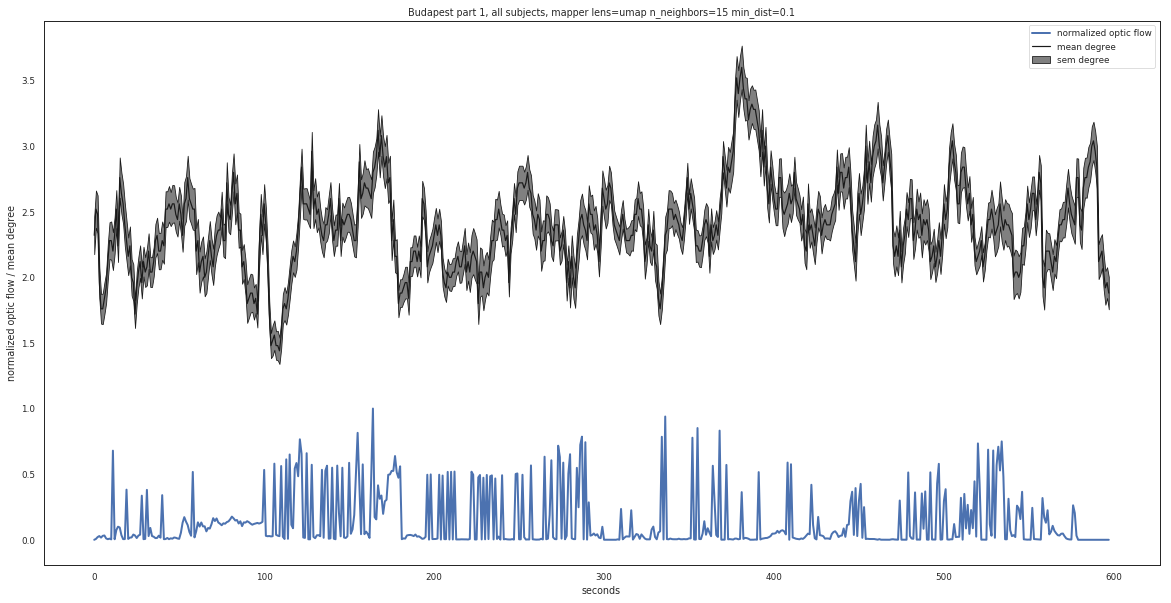

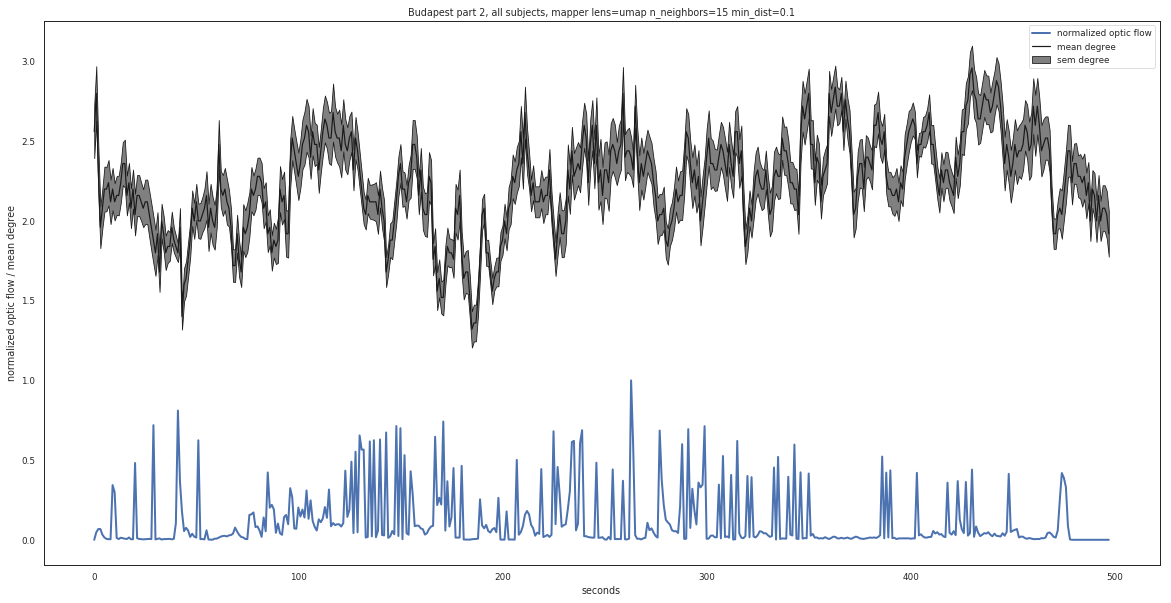

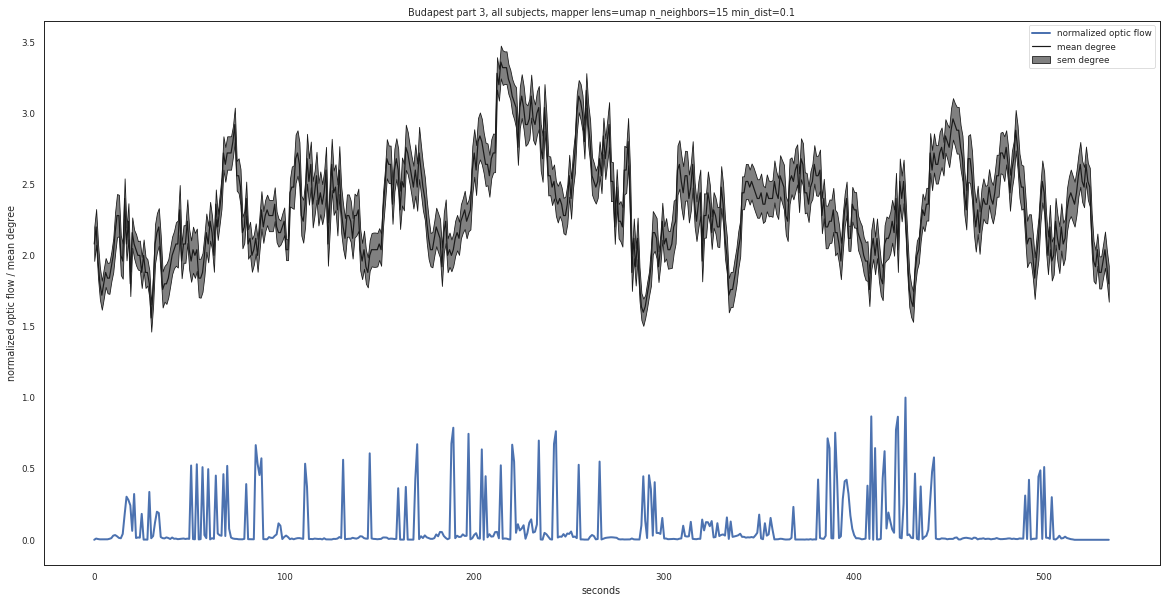

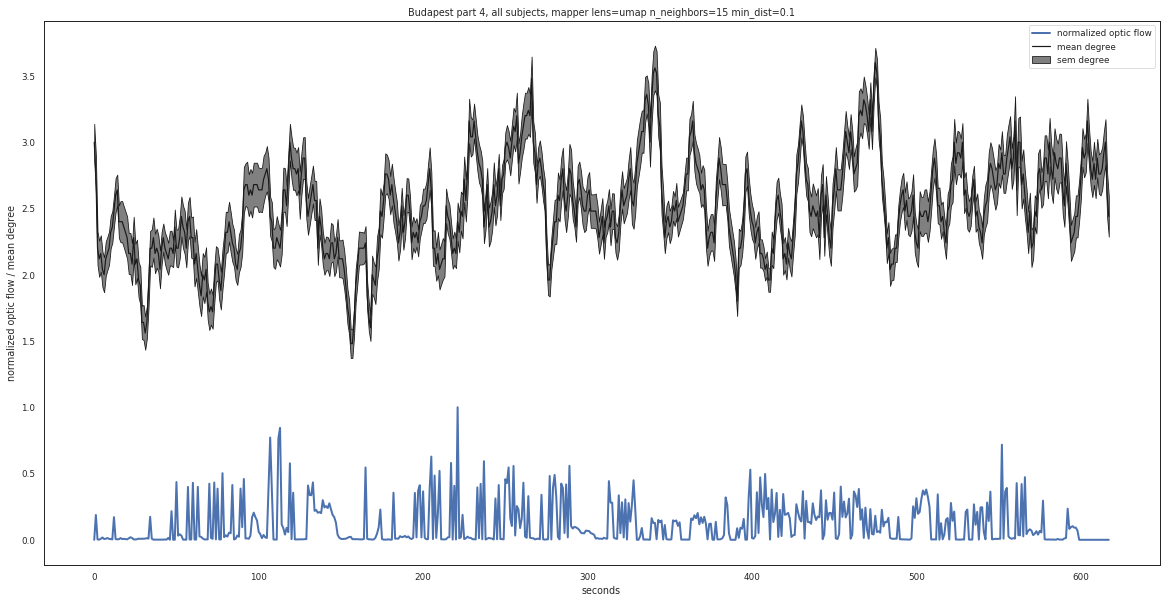

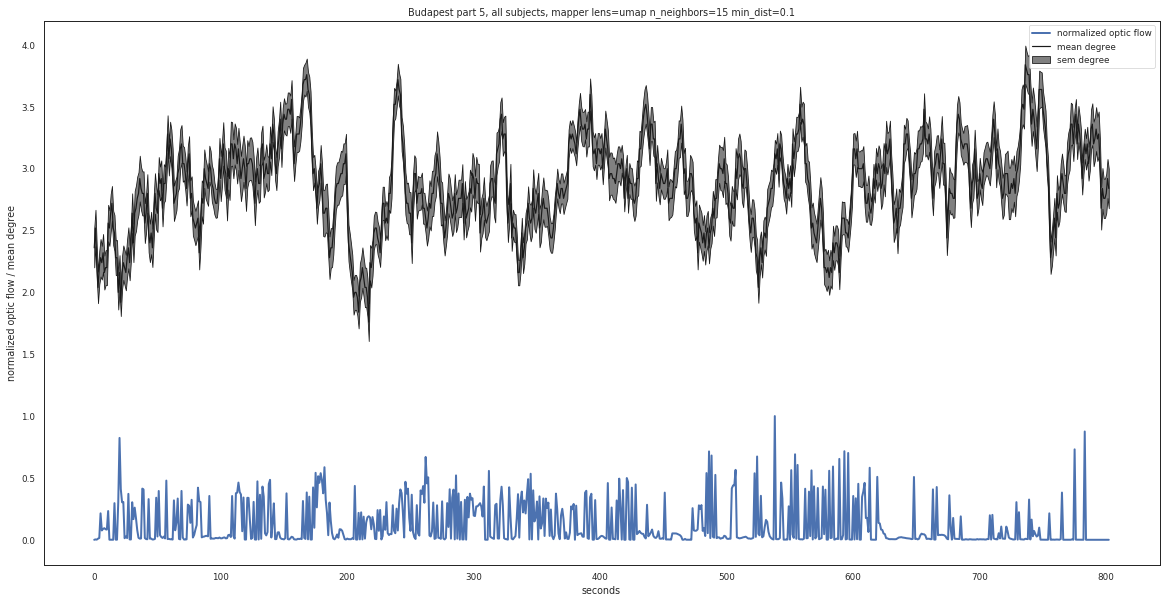

In [25]:
for r in np.arange(1,6):

    clean_path = '/nobackup/scratch/Mon/jsmentch/nat_img/outputs/mapper/degree/'
    subject_flist = list(walk(clean_path))[0][2:][0]

    degree_list = []
    run=r
    for s in subject_flist:
        if int(s[8])==int(run):
            loaded = np.load(f'../outputs/mapper/degree/{s}')
            #degree_list.append(loaded/max(loaded))
            degree_list.append(loaded)

    degree_list = np.array(degree_list)
    degree_list_sem = sem(degree_list)
    degree_list_mean = np.mean(degree_list, axis=0)
    
    np.save(f'../outputs/mapper/mean_degree/budapest{r}_mean.npy',degree_list_mean)
    np.save(f'../outputs/mapper/mean_degree/budapest{r}_sem.npy',degree_list_sem)

    flow_10hz = optic_flow_list[int(r)-1]

        
    plt.figure(figsize=(20, 10),facecolor='white')

    x=np.arange(degree_list_mean.shape[0])
    y=degree_list_mean
    error=degree_list_sem/2
    plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
    plt.plot(x,y,label='mean degree',c='k')
    plt.fill_between(x, y-error, y+error, label = 'sem degree',edgecolor='k', facecolor='gray')
    plt.ylabel('normalized optic flow / mean degree')
    plt.xlabel('seconds')
    plt.legend()
    plt.title(f'Budapest part {r}, all subjects, mapper lens=umap n_neighbors=15 min_dist=0.1')

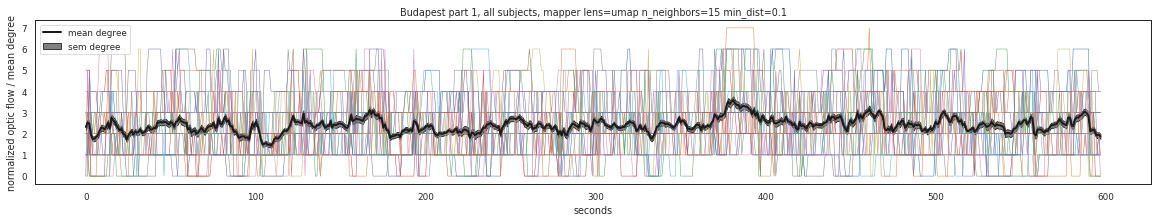

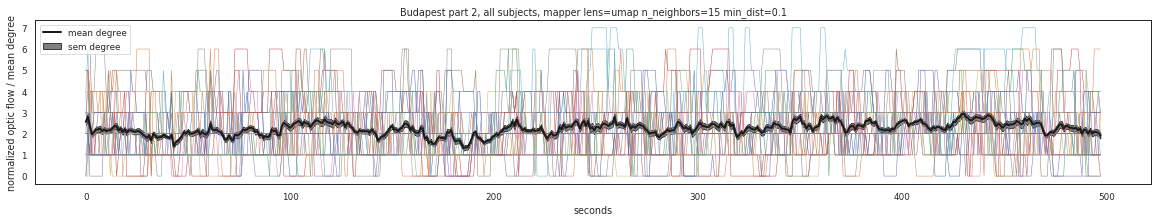

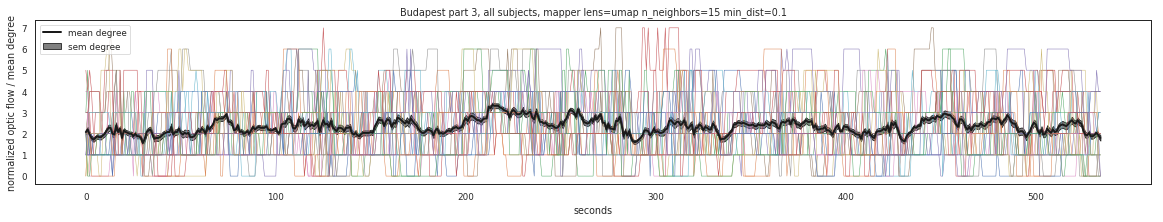

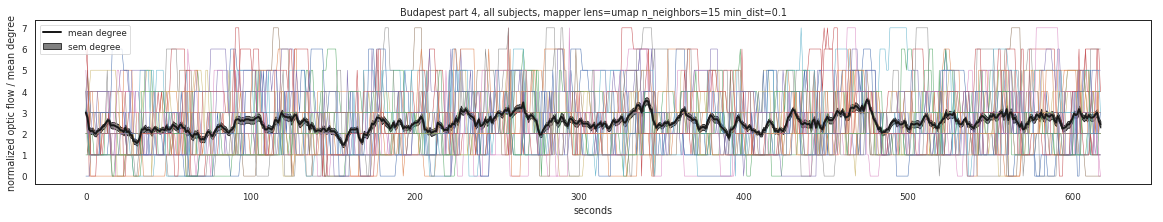

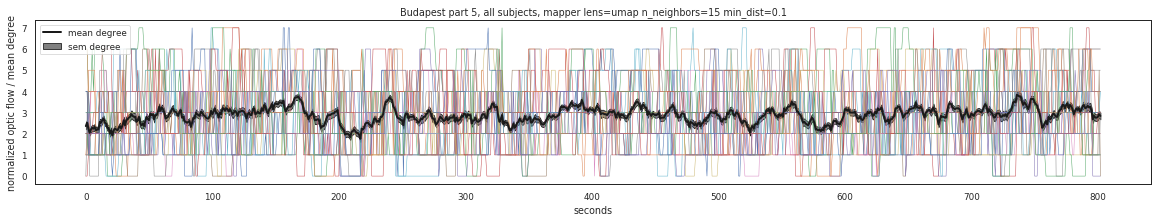

In [32]:
for r in np.arange(1,6):

    clean_path = '/nobackup/scratch/Mon/jsmentch/nat_img/outputs/mapper/degree/'
    subject_flist = list(walk(clean_path))[0][2:][0]

    degree_list = []
    run=r
    for s in subject_flist:
        if int(s[8])==int(run):
            loaded = np.load(f'../outputs/mapper/degree/{s}')
            #degree_list.append(loaded/max(loaded))
            degree_list.append(loaded)

    degree_list = np.array(degree_list)
    degree_list_sem = sem(degree_list)
    degree_list_mean = np.mean(degree_list, axis=0)

    flow_10hz = optic_flow_list[int(r)-1]

    
        
    plt.figure(figsize=(20, 3),facecolor='white')
    
    
    for d in degree_list:
        plt.plot(d,linewidth=0.5)
    
    x=np.arange(degree_list_mean.shape[0])
    y=degree_list_mean
    error=degree_list_sem/2
    #plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
    plt.plot(x,y,label='mean degree',c='k',linewidth=2)
    plt.fill_between(x, y-error, y+error, label = 'sem degree',edgecolor='k', facecolor='gray')
    plt.ylabel('normalized optic flow / mean degree')
    plt.xlabel('seconds')
    plt.legend()
    plt.title(f'Budapest part {r}, all subjects, mapper lens=umap n_neighbors=15 min_dist=0.1')

In [43]:
feature = optic_flow_list[0]/max(optic_flow_list[0])
onset=np.arange(0,feature.shape[0])
duration = np.ones(feature.shape[0])
d = {'onset': onset, 'duration': duration, 'optic_flow': feature.flatten()}
df = pd.DataFrame(data=d)
df.to_csv(f'../sourcedata/data/budapest/features/budapest1_optic_flow.tsv', sep = '\t', index=False)

In [37]:
r=1
clean_path = '/nobackup/scratch/Mon/jsmentch/nat_img/outputs/mapper/degree/'
subject_flist = list(walk(clean_path))[0][2:][0]

degree_list = []
run=r
for s in subject_flist:
    if int(s[8])==int(run):
        loaded = np.load(f'../outputs/mapper/degree/{s}')
        #degree_list.append(loaded/max(loaded))
        degree_list.append(loaded)

degree_list = np.array(degree_list)
degree_list_sem = sem(degree_list)
degree_list_mean = np.mean(degree_list, axis=0)

In [41]:
degree_list_mean.shape

(598,)

In [42]:
feature = degree_list_mean
onset=np.arange(0,feature.shape[0])
duration = np.ones(feature.shape[0])
d = {'onset': onset, 'duration': duration, 'degree': feature.flatten()}
df = pd.DataFrame(data=d)
df.to_csv(f'../sourcedata/data/budapest/features/budapest1_mean_degree.tsv', sep = '\t', index=False)